## Notebook 2 : Geographical vizualizations and regional comparisons

## 1 - Introduction ##

Overview of the notebook’s objective and the data used.


In [1]:
#### EXPLORING THE DATASET ####
import pandas as pd

# Read in the data
df_geo = pd.read_csv('df_complete.csv')

df_geo.head()

/var/folders/ql/7rnwb81s5ms8q8f6v8hbbkb00000gn/T/ipykernel_1137/325737377.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_geo = pd.read_csv('df_complete.csv')


,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07 00:00:00.000000000,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07 00:00:00.000000000,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07 00:00:00.000000000,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


In [2]:
#### CONVERTS TO THE RIGHT TYPE ####

category_convert = ['Nature mutation', 'Voie', 'Code postal', 'Commune', 'Code departement', 'Code commune', 'Code type local', 'Type local']
df_geo[category_convert] = df_geo[category_convert].astype('category')

df_geo['Date mutation'] = pd.to_datetime(df_geo['Date mutation'], errors = 'coerce')
df_geo['Date mutation'] = df_geo['Date mutation'].interpolate(method='linear')

df_geo['Valeur fonciere']=df_geo['Valeur fonciere'].replace({'\xa0':'',',':'.'}, regex=True)
df_geo['Valeur fonciere']=pd.to_numeric(df_geo['Valeur fonciere'], errors='coerce')

df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17810875 entries, 0 to 17810874
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Date mutation              datetime64[ns]
 1   Nature mutation            category      
 2   Valeur fonciere            float64       
 3   Voie                       category      
 4   Code postal                category      
 5   Commune                    category      
 6   Code departement           category      
 7   Code commune               category      
 8   Nombre de lots             int64         
 9   Code type local            category      
 10  Type local                 category      
 11  Surface reelle bati        float64       
 12  Nombre pieces principales  float64       
 13  Surface terrain            float64       
 14  annee                      int64         
dtypes: category(8), datetime64[ns](1), float64(4), int64(2)
memory usage: 1.2 GB


In [3]:
#### CHECK MISSING VALUES ####
df_geo.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
Voie                         0
Code postal                  0
Commune                      0
Code departement             0
Code commune                 0
Nombre de lots               0
Code type local              0
Type local                   0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
annee                        0
dtype: int64

In [4]:
#### CHECK DUPLICATES ####
#df_geo.drop_duplicates(keep='last', inplace=True)
df_geo.duplicated().sum()

0

In [5]:
df_geo.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


## 2 - Methodology ##

Explanation of the analysis methods and visualizations.

Data Exploration:
- Analyze geographical data (communes, departments) and its relationship to property values.
- Study temporal trends in transactions across regions.

In [44]:
#### LIBRARIES ####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import time
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [46]:
!pip install geopandas --no-build-isolation


  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyogrio-0.10.0.tar.gz (281 kB)
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      Traceback (most recent call last):
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 149, in prepare_metadata_for_build_wheel
          return hook(metadata_directory, config_settings)
             

In [7]:
#### PRICE PER SQUARE METER ####
df_geo['price_per_sq_meter'] = df_geo['Valeur fonciere'] / df_geo['Surface reelle bati']
df_geo['price_per_sq_meter'] = df_geo['price_per_sq_meter'].round(2)
df_geo.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,price_per_sq_meter
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019,1628.00
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019,2074.47
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019,2074.47
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019,1222.56
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019,inf


In [8]:
#### ANALISYS OF WHEN THERE'S NO BUILD ####
df_no_build = df_geo[df_geo['Surface reelle bati']==0]
mean_no_build = round(df_no_build['Valeur fonciere'].mean(), 2)
median_no_build = round(df_no_build['Valeur fonciere'].median(), 2)

print('No build average price per square meter : ', mean_no_build, '€')
print('No build median price per square meter : ', median_no_build, '€')

No build average price per square meter :  385543.11 €
No build median price per square meter :  120000.0 €


In [9]:
#### DELETE THE INF ####
df_geo['price_per_sq_meter'] = df_geo['price_per_sq_meter'].replace([np.inf, -np.inf], np.nan)
df_geo.dropna(subset=['price_per_sq_meter'], inplace=True)
df_geo.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,price_per_sq_meter
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019,1628.00
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019,2074.47
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019,2074.47
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019,1222.56
5,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,1.0,Maison,110.0,5.0,2483.0,2019,1458.64


In [10]:
df_geo.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
Voie                         0
Code postal                  0
Commune                      0
Code departement             0
Code commune                 0
Nombre de lots               0
Code type local              0
Type local                   0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
annee                        0
price_per_sq_meter           0
dtype: int64

In [28]:
#### GROUPING DATA BY DEPARTMENT AND COMMUNE + METRICS CALCULUS ####
grouped_geo = df_geo.groupby(['Code departement', 'Commune'], observed=True).agg(
    mean_value=('Valeur fonciere', 'mean'),
    median_value=('Valeur fonciere', 'median'),
    sum_value=('Valeur fonciere', 'sum'),
    count_transactions=('Valeur fonciere', 'count'),
    avg_price_per_sq_meter=('price_per_sq_meter', 'mean')
).reset_index()

grouped_geo.head()

,Code departement,Commune,mean_value,median_value,sum_value,count_transactions,avg_price_per_sq_meter
0,1,ABERGEMENT-DE-VAREY (L ),221209.090909,151500.0,4.866600e+06,22,2173.657273
1,1,AMBERIEU-EN-BUGEY,292340.818088,180000.0,4.189244e+08,1433,3348.534997
2,1,AMBERIEUX-EN-DOMBES,456563.153017,300000.0,1.059227e+08,232,6723.550388
3,1,AMBLEON,153721.153846,140000.0,1.998375e+06,13,1649.996923
4,1,AMBRONAY,215684.533807,222000.0,4.248985e+07,197,2170.585330


In [12]:
grouped_geo.isnull().sum()

Code departement          0
Commune                   0
mean_value                0
median_value              0
sum_value                 0
count_transactions        0
avg_price_per_sq_meter    0
dtype: int64

In [13]:
grouped_geo.describe()

,mean_value,median_value,sum_value,count_transactions,avg_price_per_sq_meter
count,3.601100e+04,3.601100e+04,3.601100e+04,36011.000000,3.601100e+04
mean,3.829089e+05,1.808535e+05,1.662621e+08,187.769376,5.036595e+03
std,2.438199e+06,1.180005e+06,3.169427e+09,908.061425,3.929502e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.278895e+05,1.137000e+05,2.631419e+06,18.000000,1.361230e+03
50%,1.764647e+05,1.577500e+05,7.694298e+06,44.000000,1.857614e+03
75%,2.444724e+05,2.115000e+05,2.384110e+07,113.000000,2.639380e+03
max,1.177274e+08,2.206233e+08,3.668532e+11,50966.000000,2.304816e+06


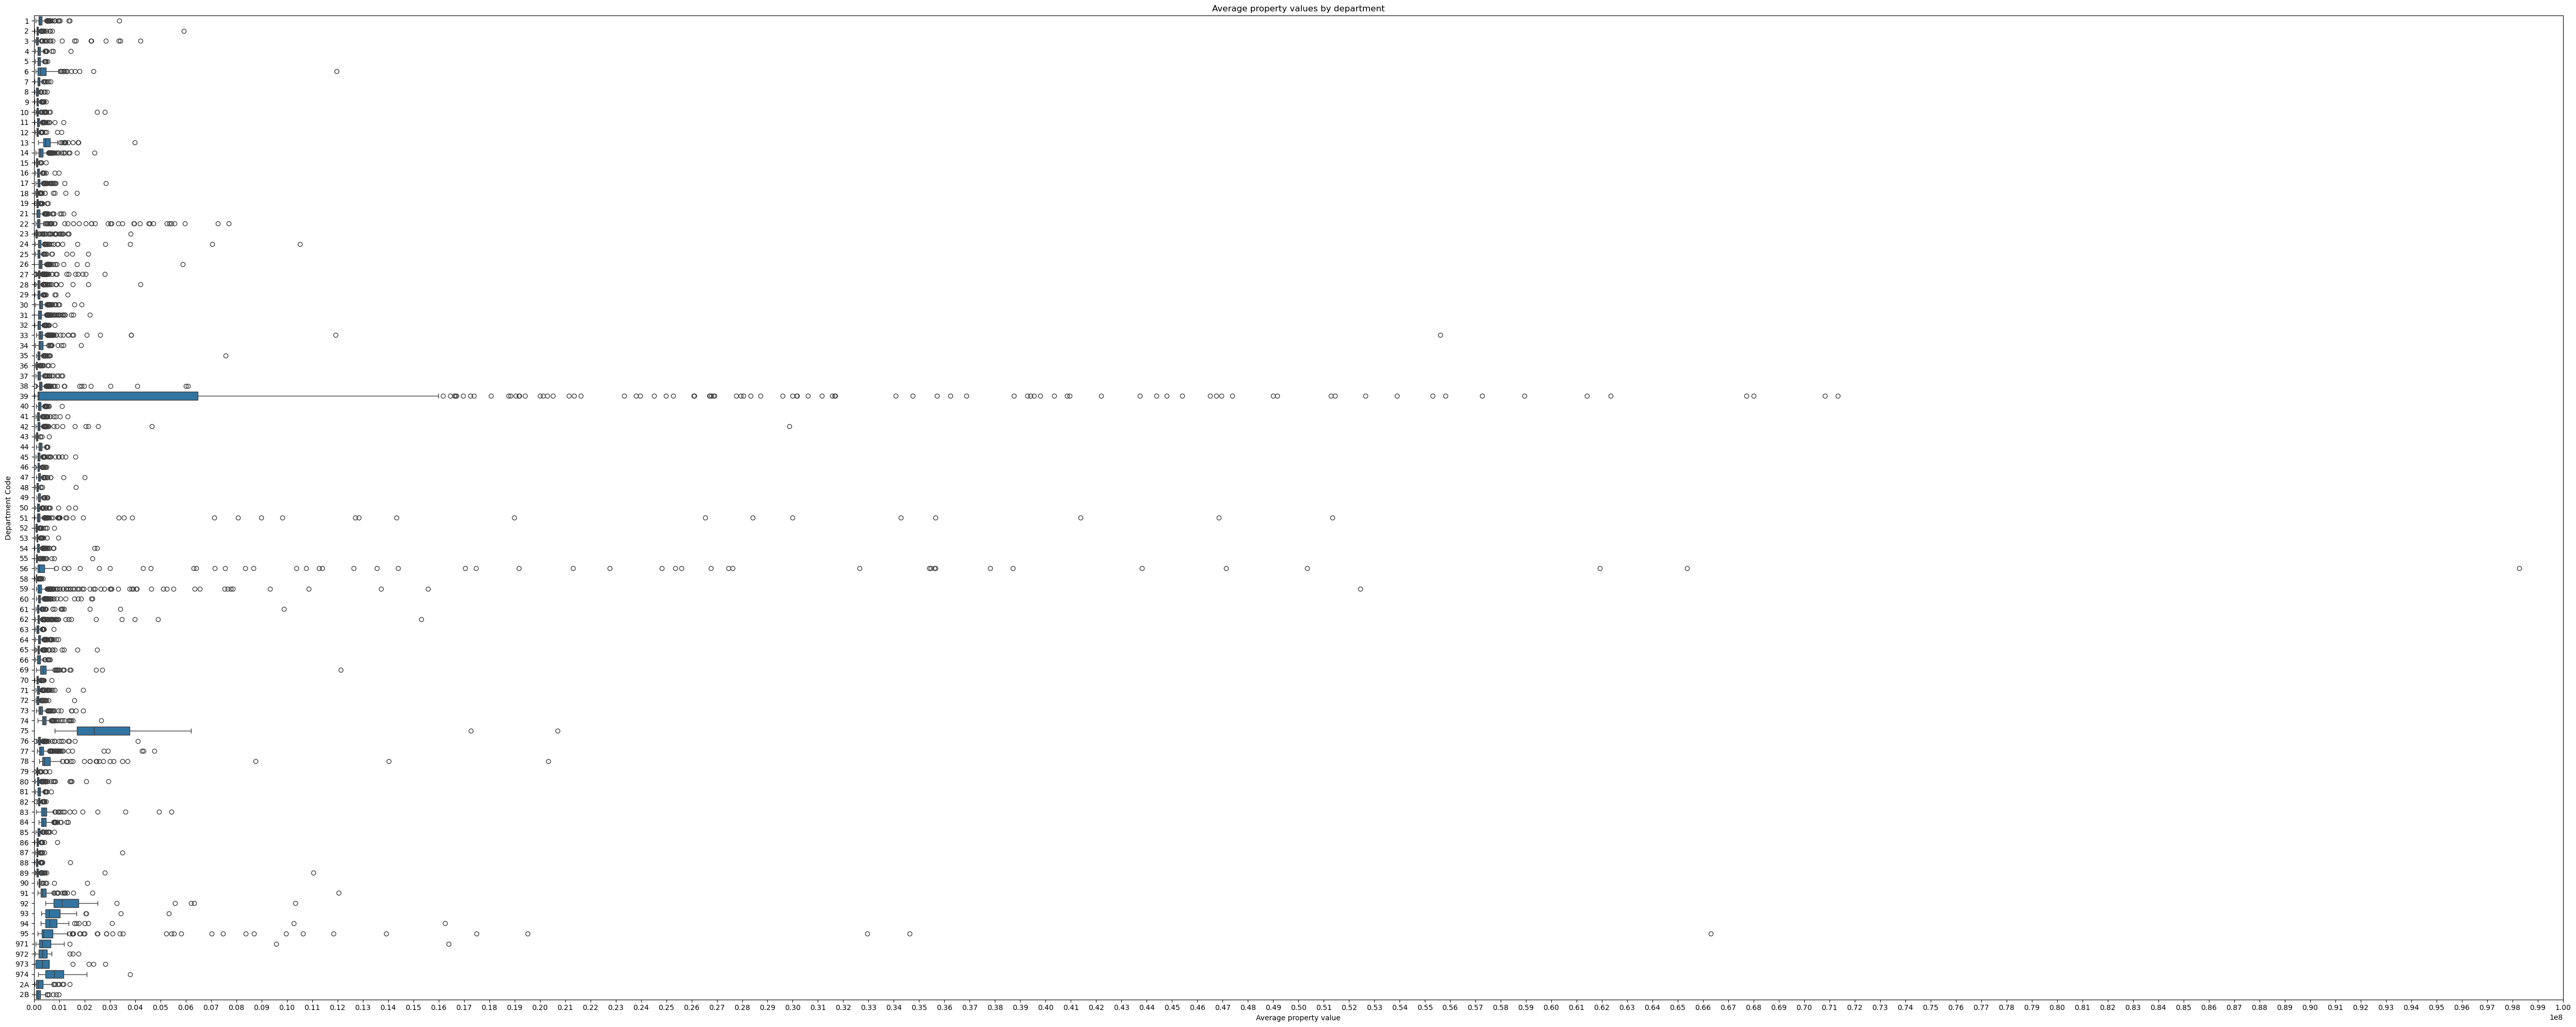

In [14]:
#### IDENTIFY OUTLIERS ####
plt.figure(figsize=(50, 20))
sns.boxplot(data=grouped_geo, x='mean_value', y='Code departement')

plt.title('Average property values by department')
plt.xlabel('Average property value')
plt.ylabel('Department Code')
x_ticks = np.arange(0, grouped_geo['mean_value'].max(), step=1000000)
plt.xticks(x_ticks)
plt.xlim(-10, 100000000)
#plt.yticks(range(start, end, step))
#plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

There are a lot of outliers , this can be explained because of the type of local sold, the year they were sold (inflation ?), their size or their localization. Let's analyze that.

In [18]:
#### SEPARATE OUTLIERS WITH IQR ####
Q1 = df_geo['Valeur fonciere'].quantile(0.25)
Q3 = df_geo['Valeur fonciere'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_geo[(df_geo['Valeur fonciere'] < lower_bound) | (df_geo['Valeur fonciere'] > upper_bound)]
non_outliers = df_geo[(df_geo['Valeur fonciere'] >= lower_bound) & (df_geo['Valeur fonciere'] <= upper_bound)]

outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,price_per_sq_meter
117,2019-03-07 00:00:00.000000000,Vente,3000000.0,MARECHAL JUIN,1000.0,BOURG-EN-BRESSE,1,53,0,4.0,Local industriel. commercial ou assimilé,2465.0,0.0,5926.0,2019,1217.04
1813,2019-08-14 08:43:38.181818112,Vente,644100.0,DU PLAN D'EAU,1370.0,VAL-REVERMONT,1,426,0,4.0,Local industriel. commercial ou assimilé,2191.0,0.0,5247.0,2019,293.98
1814,2019-07-31 10:54:32.727272704,Vente,644100.0,DU PLAN D'EAU,1370.0,VAL-REVERMONT,1,426,0,4.0,Local industriel. commercial ou assimilé,2191.0,0.0,5000.0,2019,293.98
2564,2019-06-11 00:00:00.000000000,Vente,720000.0,DU 1ER SEPTEMBRE 1944,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,438.0,0.0,273.0,2019,1643.84
2565,2019-07-11 09:36:00.000000000,Vente,720000.0,DU 1ER SEPTEMBRE 1944,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,782.0,0.0,559.0,2019,920.72


We see that a lot of them are commercial or industrial locals which could explain why they are expensive.

In [38]:
#### GROUPING OUTLIERS BY DEPARTMENT AND COMMUNE ####
grouped_outliers = outliers.groupby(['Code departement', 'Commune'], observed=True).agg(
    mean_outliers_value=('Valeur fonciere', 'mean'),
    median_outliers_value=('Valeur fonciere', 'median'),
    sum_outliers_value=('Valeur fonciere', 'sum'),
    count_outliers_transactions=('Valeur fonciere', 'count'),
    outliers_avg_price_per_sq_meter=('price_per_sq_meter', 'mean')
).reset_index()

grouped_outliers.head()

,Code departement,Commune,mean_outliers_value,median_outliers_value,sum_outliers_value,count_outliers_transactions,outliers_avg_price_per_sq_meter
0,1,AMBERIEU-EN-BUGEY,2.362516e+06,1375200.0,148838522.5,63,16678.371429
1,1,AMBERIEUX-EN-DOMBES,1.668587e+06,872600.0,43383255.7,26,23280.409615
2,1,ARBENT,3.174348e+06,2349134.0,57138268.0,18,28574.047222
3,1,ARBOYS EN BUGEY,6.490000e+05,649000.0,649000.0,1,3863.100000
4,1,ARS-SUR-FORMANS,9.918142e+05,1180000.0,12893585.0,13,7796.190769


In [39]:
grouped_outliers.isnull().sum()

Code departement                   0
Commune                            0
mean_outliers_value                0
median_outliers_value              0
sum_outliers_value                 0
count_outliers_transactions        0
outliers_avg_price_per_sq_meter    0
dtype: int64

In [37]:
#### METRICS COMPARISON ####

# All
mean_all = df_geo['Valeur fonciere'].mean()
median_all = df_geo['Valeur fonciere'].median()

# Non-outliers
mean_non_outliers = non_outliers['Valeur fonciere'].mean()
median_non_outliers = non_outliers['Valeur fonciere'].median()

# Outliers
mean_outliers = outliers['Valeur fonciere'].mean()
median_outliers = outliers['Valeur fonciere'].median()

print("General mean :", mean_all)
print("General median :", median_all)
print("\nNon-outliers mean :", mean_non_outliers)
print("Non-outliers median :", median_non_outliers)
print("\nOutliers mean :", mean_outliers)
print("Outliers median :", median_outliers)


General mean : 885459.2904764488
General median : 191900.0

Non-outliers mean : 205565.86862418838
Non-outliers median : 177450.0

Outliers mean : 8005812.542774477
Outliers median : 1070000.0


We see that the general metrics are greatly affected by the outliers, which is why it is necessary to separate them from the rest.

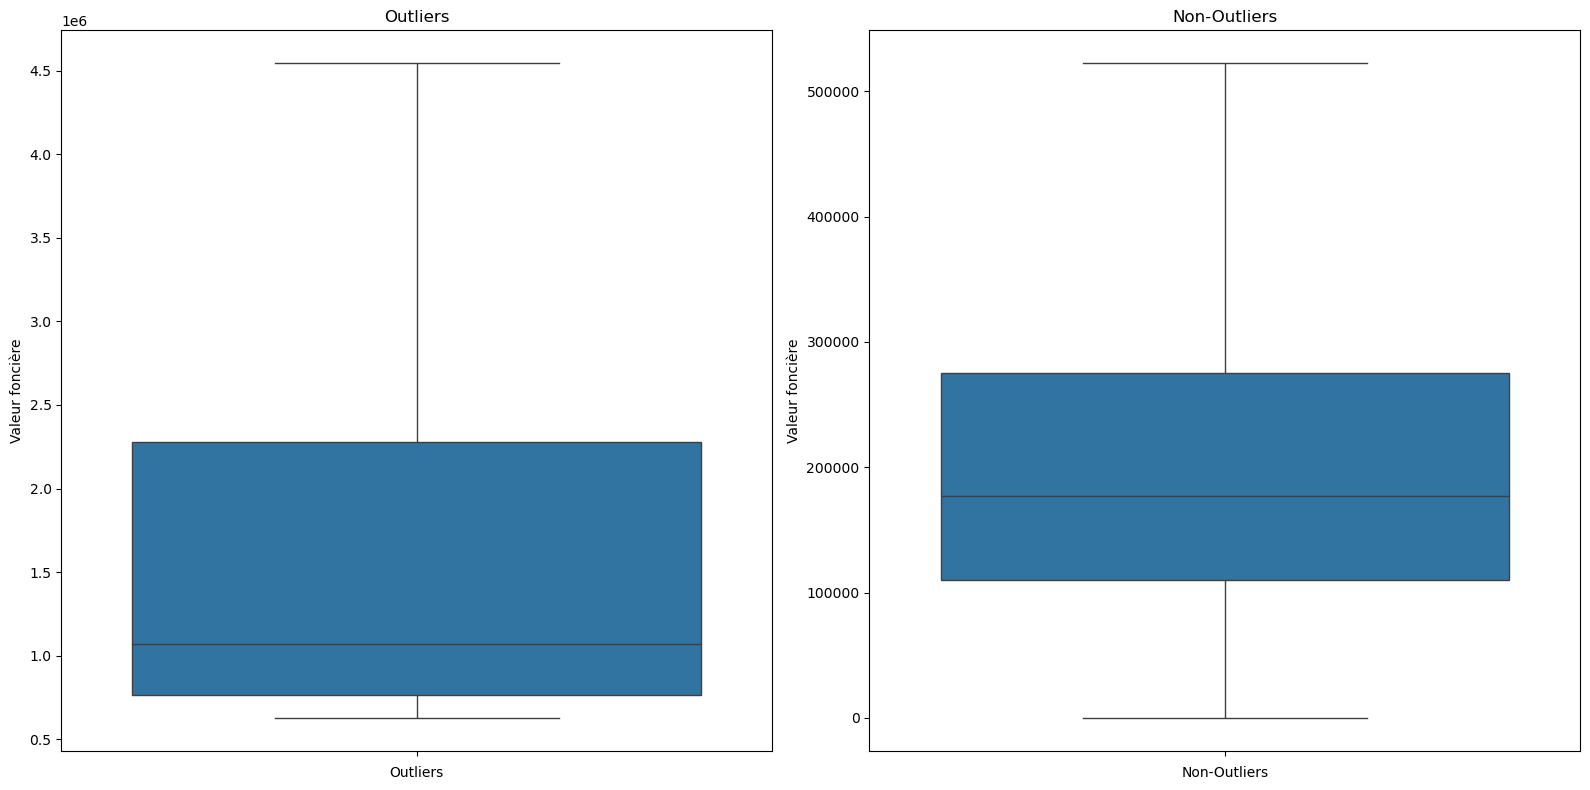

In [34]:
#### COMPARISON BW OUTLIERS AND NON-OUTLIERS ####
plt.figure(figsize=(16, 8))

# Outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=outliers['Valeur fonciere'], showfliers=False)
plt.title('Outliers')
plt.ylabel('Valeur foncière')
plt.xlabel('Outliers')

# Non-outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=non_outliers['Valeur fonciere'], showfliers=False)
plt.title('Non-Outliers')
plt.ylabel('Valeur foncière')
plt.xlabel('Non-Outliers')

plt.tight_layout()
plt.show()


We see that the outliers start at 500 000€, exactly where the non outliers stop, and they go up to 4 500 000€.

## 3 - Results ##

Presentation of the analyses, visualizations, and findings.

Visualizations:
- Interactive maps of property values by department/commune.
- Bar charts or heatmaps comparing average prices by region.

## 4 - Conlusion and recommandations ##

Summary of discoveries and investment advice.

Conclusions:
- Identify regions with the highest or lowest property values.
- Spot any geographical anomalies in property prices.

Recommendations :
- Investment advice based on regions with strong growth or attractive prices.
- Suggestions on how to leverage geographical trends for better returns.